In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Bank Customer Churn Prediction.csvs

[Errno 2] No such file or directory: '/content/drive/MyDrive/Bank Customer Churn Prediction.csvs'
/content


In [3]:
#Import Required Packages for EDA 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Read the dataset/s

df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')


In [5]:
#(1)	The EDA starts with  understanding the basic description of data as described next:
#1. Checking description(first 5 and last 5 rows)
df.head() 


customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [6]:
df.tail()

customer_id  credit_score  country  gender  age  tenure    balance  \
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0

In [7]:
df.shape

(10000, 12)

In [8]:
# name of the attributes
df.columns
 

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
#unique values for each attribute
df.nunique()


customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [10]:
#Complete info about data frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


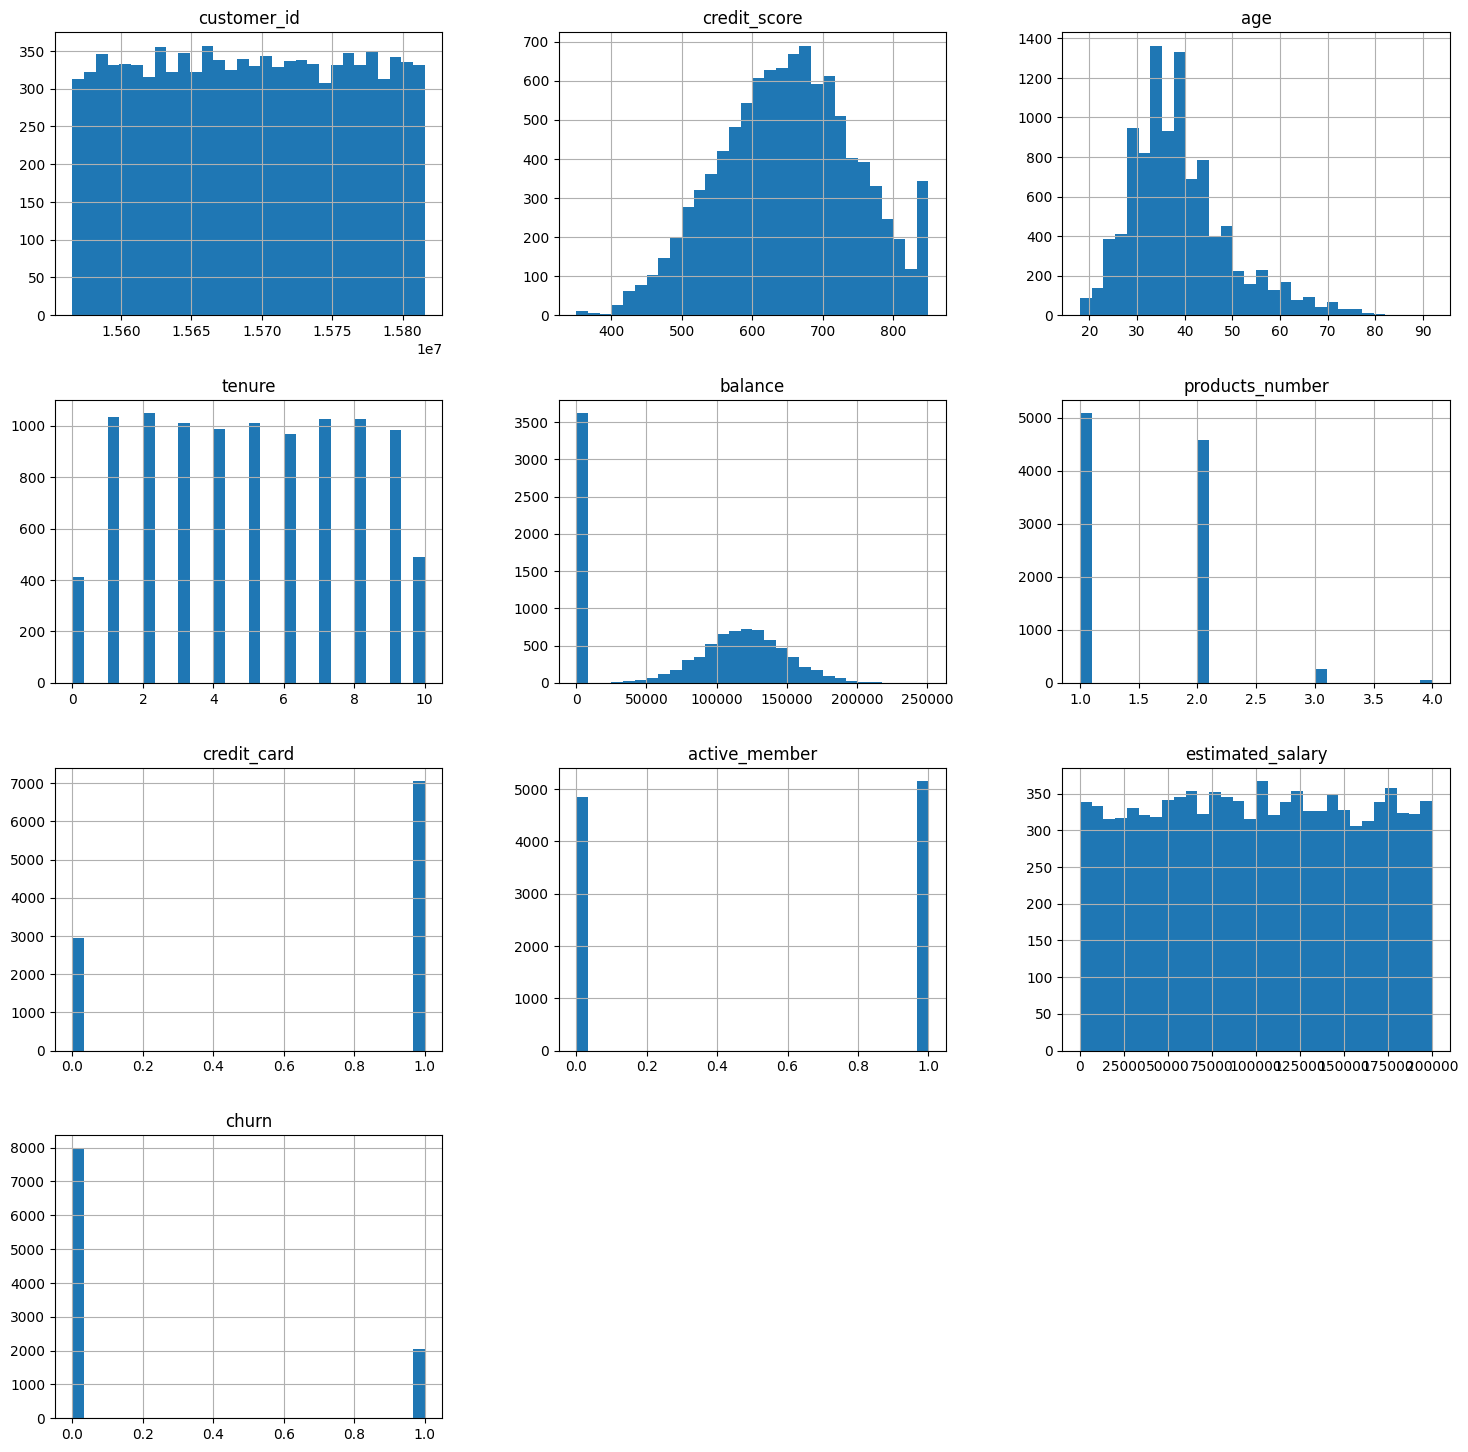

In [11]:
#3. Visualising data  distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()


0    7963
1    2037
Name: churn, dtype: int64


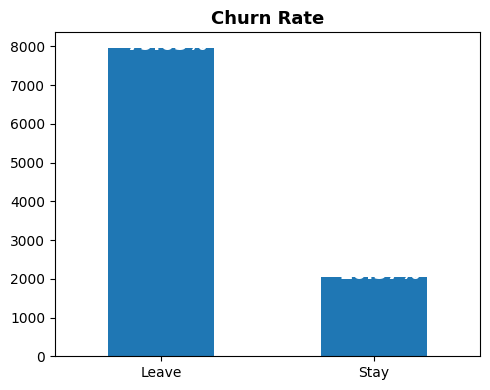

In [12]:

#checking target value distribution
print(df.churn.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Leave", "Stay"]
ax = df.churn.value_counts().plot(kind='bar')
ax.set_title("Churn Rate", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


In [13]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.6 MB 18.0 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=3b6ecea6bb1c688a1a8558d11eef79416028687fe4e7ba29eecdfc7801e385fd
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [14]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Bank Customer Churn Prediction",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619      0.0     0.0   42       2       0.00   
1        15647311           608      2.0     0.0   41       1   83807.86   
2        15619304           502      0.0     0.0   42       8  159660.80   
3        15701354           699      0.0     0.0   39       1       0.00   
4        15737888           850      2.0     0.0   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771      0.0     1.0   39       5       0.00   
9996     15569892           516      0.0     1.0   35      10   57369.61   
9997     15584532           709      0.0     0.0   36       7       0.00   
9998     15682355           772      1.0     1.0   42       3   75075.31   
9999     15628319           792      0.0     0.0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [16]:
class_label =df['churn']
df = df.drop(['churn'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['churn']=class_label
df


customer_id  credit_score  country  gender       age  tenure   balance  \
0        0.275616         0.538      0.0     0.0  0.324324     0.2  0.000000   
1        0.326454         0.516      1.0     0.0  0.310811     0.1  0.334031   
2        0.214421         0.304      0.0     0.0  0.324324     0.8  0.636357   
3        0.542636         0.698      0.0     0.0  0.283784     0.1  0.000000   
4        0.688778         1.000      1.0     0.0  0.337838     0.2  0.500246   
...           ...           ...      ...     ...       ...     ...       ...   
9995     0.162119         0.842      0.0     1.0  0.283784     0.5  0.000000   
9996     0.016765         0.332      0.0     1.0  0.229730     1.0  0.228657   
9997     0.075327         0.718      0.0     0.0  0.243243     0.7  0.000000   
9998     0.466637         0.844      0.5     1.0  0.324324     0.3  0.299226   
9999     0.250483         0.884      0.0     0.0  0.135135     0.4  0.518708   

      products_number  credit_card  active_member  estimated_salary  churn  
0            0.000000          1.0            1.0          0.506735      1  
1            0.000000          0.0            1.0          0.562709      0  
2            0.666667          1.0            0.0          0.569654      1  
3            0.333333          0.0            0.0          0.469120      0  
4            0.000000          1.0            1.0          0.395400      0  
...               ...          ...            ...               ...    ...  
9995         0.333333          1.0            0.0          0.481341      0  
9996         0.000000          1.0            1.0          0.508490      0  
9997         0.000000          0.0            1.0          0.210390      1  
9998         0.333333          1.0            0.0          0.464429      1  
9999         0.000000          1.0            0.0          0.190914      0  

[10000 rows x 12 columns]

In [17]:
#pre-processing
customer_data = df.copy()
le = preprocessing.LabelEncoder()
customer_id = le.fit_transform(list(customer_data["customer_id"])) 
credit_score = le.fit_transform(list(customer_data["credit_score"])) 
country = le.fit_transform(list(customer_data["country"])) 
gender = le.fit_transform(list(customer_data["gender"])) 
age = le.fit_transform(list(customer_data["age"])) 
tenure = le.fit_transform(list(customer_data["tenure"])) 
balance = le.fit_transform(list(customer_data["balance"]))  
products_number = le.fit_transform(list(customer_data["products_number"])) 
credit_card = le.fit_transform(list(customer_data["credit_card"]))
active_member = le.fit_transform(list(customer_data["active_member"]))
estimated_salary = le.fit_transform(list(customer_data["estimated_salary"]))
churn = le.fit_transform(list(customer_data["churn"]))



In [18]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [19]:
x = list(zip(customer_id, credit_score, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary))
y = list(churn)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows

#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((8000, 10), (2000, 10))

In [20]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.824375 (0.009279)

SVM: 0.796750 (0.011274)

GBM: 0.857375 (0.008673)

RF: 0.851750 (0.009597)



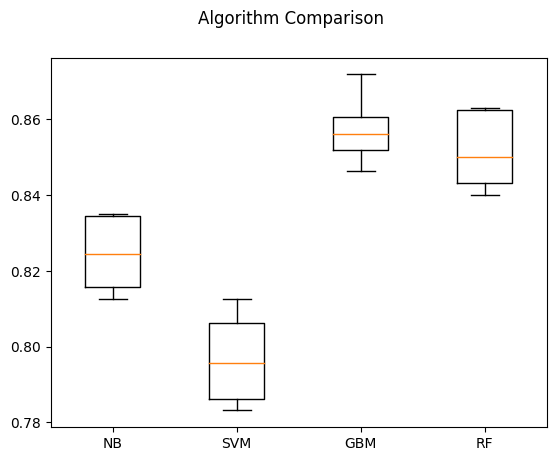

In [21]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [22]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

svm = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

best_model = svm

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.7945


In [23]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1589
           1       0.00      0.00      0.00       411

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



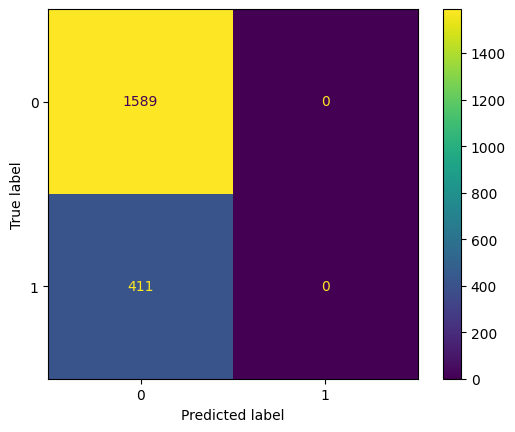

In [24]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [25]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)



Predicted:  0 Actual:  1 Data:  (779, 326, 1, 17, 1, 0, 2, 0, 0, 8727)
Predicted:  0 Actual:  0 Data:  (6467, 286, 0, 54, 8, 0, 1, 1, 1, 7710)
Predicted:  0 Actual:  0 Data:  (4714, 397, 0, 15, 5, 0, 1, 0, 0, 5873)
Predicted:  0 Actual:  0 Data:  (2598, 146, 0, 35, 3, 0, 0, 1, 1, 4563)
Predicted:  0 Actual:  0 Data:  (9390, 326, 0, 21, 6, 0, 1, 1, 0, 4670)
Predicted:  0 Actual:  0 Data:  (8855, 259, 1, 23, 9, 0, 1, 0, 1, 9572)
Predicted:  0 Actual:  0 Data:  (3184, 371, 0, 8, 7, 3528, 1, 1, 1, 8465)
Predicted:  0 Actual:  0 Data:  (5021, 344, 1, 11, 10, 0, 1, 1, 1, 4773)
Predicted:  0 Actual:  0 Data:  (4266, 287, 0, 13, 1, 0, 1, 0, 1, 6536)
Predicted:  0 Actual:  1 Data:  (1176, 188, 0, 21, 5, 3030, 2, 0, 0, 301)
Predicted:  0 Actual:  1 Data:  (2090, 83, 1, 36, 3, 0, 0, 1, 0, 5439)
Predicted:  0 Actual:  0 Data:  (3681, 390, 0, 9, 5, 0, 1, 0, 0, 3610)
Predicted:  0 Actual:  1 Data:  (7507, 278, 1, 7, 1, 5750, 0, 0, 0, 1850)
Predicted:  0 Actual:  0 Data:  (9680, 94, 1, 33, 7, 5088, 1